In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
od = pd.read_csv("A:\Additional\Sculpture_Cost.csv")
od.head(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
od.shape

(6500, 20)

In [4]:
od.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [5]:
od.duplicated().sum()

0

In [6]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

#### Inference:
1. We have No duplicate Values.
2. Data has Missing values in almost half of features.
3. We have 13 object Columns and 7 float columns.
4. Data is in shape of 6,500 rows and 20 Columns.
5. We have negative values in our Cost Column which can't be possible so we have to treat those columns as well.
6. We also have date columns incorrectly casted as object cols.

In [7]:
obj_cols=od.select_dtypes(include='object').columns
obj_cols

Index(['Customer Id', 'Artist Name', 'Material', 'International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information', 'Remote Location', 'Scheduled Date',
       'Delivery Date', 'Customer Location'],
      dtype='object')

In [8]:
num_cols=od.select_dtypes(exclude='object').columns
num_cols

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture',
       'Base Shipping Price', 'Cost'],
      dtype='object')

Null Value Treatment

for Numeric Columns lets fill them with their mean values

In [9]:
for i in num_cols:
    od[i]=od[i].fillna(od[i].mean())

In [10]:
od

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4.128000e+03,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,6.100000e+01,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,2.370000e+02,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,4.006948e+05,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,3.240000e+02,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.000000,1.655100e+04,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,9.617647,1.898100e+04,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.000000,5.870000e+02,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,04-10-2019,04-09-2019,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.000000,1.269377e+06,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,03-10-2019,03-12-2019,"Hintonberg, UT 35006",5037.50


In [11]:
od.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

Now We have null values in categorical Column lets fill them with their previous Values.

In [12]:
for i in obj_cols:
    od[i] = od[i].fillna(method="backfill")
od.shape

(6500, 20)

In [13]:
od.isnull().sum()

Customer Id              0
Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

In [14]:
od

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4.128000e+03,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,6.100000e+01,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,2.370000e+02,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,4.006948e+05,Aluminium,5.81,16.31,No,No,No,Airways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,3.240000e+02,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.000000,1.655100e+04,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,9.617647,1.898100e+04,Clay,67.18,27.72,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.000000,5.870000e+02,Clay,6.92,10.38,Yes,No,No,Roadways,Yes,Wealthy,No,04-10-2019,04-09-2019,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.000000,1.269377e+06,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,03-10-2019,03-12-2019,"Hintonberg, UT 35006",5037.50


Treatment of negative costs

In [15]:
nd = od[od['Cost'] > 0]
nd.shape

(5841, 20)

In [16]:
nd

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
650,fffe3800340030003400,George Hartman,0.94,5.000000,5.000000,62.0,Wood,6.17,23.53,No,Yes,No,Roadways,No,Working Class,No,02/13/18,02-12-2018,"Lake Debraport, MI 42385",561.98
651,fffe3600360039003000,Vincent Daves,0.64,5.000000,5.000000,315.0,Brass,5.74,15.91,No,No,No,Roadways,No,Working Class,No,11/28/18,11/26/18,"Monicaton, AK 90457",243.11
652,fffe3400300039003100,Scott Mitchell,0.29,21.766204,9.000000,1382.0,Marble,4.98,15.04,No,No,Yes,Roadways,Yes,Wealthy,No,02/13/19,02/13/19,"Jeffreyborough, AZ 14516",224.14
653,fffe330037003500,Marcia Chevrette,0.74,25.000000,18.000000,917520.0,Marble,848.75,52.62,No,Yes,Yes,Roadways,No,Wealthy,No,12/18/17,12/18/17,"South Richard, HI 75014",87760.07
654,fffe3200330032003900,George Marcus,0.61,14.000000,7.000000,3172.0,Bronze,12.78,10.23,No,Yes,No,Airways,No,Working Class,No,12/22/15,12/20/15,"Howellberg, PA 00833",317.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.000000,10.000000,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.000000,9.617647,18981.0,Clay,67.18,27.72,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.000000,8.000000,587.0,Clay,6.92,10.38,Yes,No,No,Roadways,Yes,Wealthy,No,04-10-2019,04-09-2019,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.000000,9.000000,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,03-10-2019,03-12-2019,"Hintonberg, UT 35006",5037.50


In [17]:
# Converting dates into datetime format in the dataframe.

nd['Scheduled Date'] = pd.to_datetime(nd['Scheduled Date'])
nd['Delivery Date'] = pd.to_datetime(nd['Delivery Date'])

nd.head(2)

C:\Users\abhis\AppData\Local\Temp\ipykernel_9960\3881277137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd['Scheduled Date'] = pd.to_datetime(nd['Scheduled Date'])
C:\Users\abhis\AppData\Local\Temp\ipykernel_9960\3881277137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd['Delivery Date'] = pd.to_datetime(nd['Delivery Date'])


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
650,fffe3800340030003400,George Hartman,0.94,5.0,5.0,62.0,Wood,6.17,23.53,No,Yes,No,Roadways,No,Working Class,No,2018-02-13,2018-02-12,"Lake Debraport, MI 42385",561.98
651,fffe3600360039003000,Vincent Daves,0.64,5.0,5.0,315.0,Brass,5.74,15.91,No,No,No,Roadways,No,Working Class,No,2018-11-28,2018-11-26,"Monicaton, AK 90457",243.11


In [18]:
nd.dtypes

Customer Id                      object
Artist Name                      object
Artist Reputation               float64
Height                          float64
Width                           float64
Weight                          float64
Material                         object
Price Of Sculpture              float64
Base Shipping Price             float64
International                    object
Express Shipment                 object
Installation Included            object
Transport                        object
Fragile                          object
Customer Information             object
Remote Location                  object
Scheduled Date           datetime64[ns]
Delivery Date            datetime64[ns]
Customer Location                object
Cost                            float64
dtype: object

In [19]:
cat_cols=nd.select_dtypes(include='object').columns
cat_cols

Index(['Customer Id', 'Artist Name', 'Material', 'International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information', 'Remote Location', 'Customer Location'],
      dtype='object')

In [20]:
od.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [21]:
od2 = nd.drop(columns = ['Customer Id', 'Artist Name','Customer Location'])

In [22]:
cat_cols=od2.select_dtypes(include='object').columns
cat_cols

Index(['Material', 'International', 'Express Shipment',
       'Installation Included', 'Transport', 'Fragile', 'Customer Information',
       'Remote Location'],
      dtype='object')

### EDA

Aluminium    0.147064
Brass        0.146893
Wood         0.145181
Clay         0.143811
Bronze       0.142441
Marble       0.142099
Stone        0.132512
Name: Material, dtype: float64
No     0.661702
Yes    0.338298
Name: International, dtype: float64
No     0.669748
Yes    0.330252
Name: Express Shipment, dtype: float64
No     0.602637
Yes    0.397363
Name: Installation Included, dtype: float64
Roadways     0.404896
Airways      0.353707
Waterways    0.241397
Name: Transport, dtype: float64
No     0.838726
Yes    0.161274
Name: Fragile, dtype: float64
Working Class    0.73686
Wealthy          0.26314
Name: Customer Information, dtype: float64
No     0.801233
Yes    0.198767
Name: Remote Location, dtype: float64


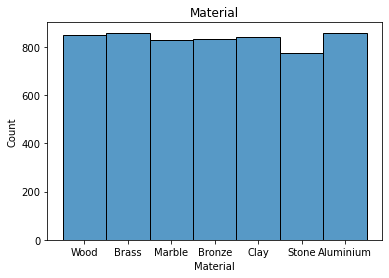

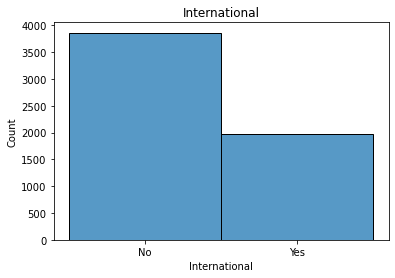

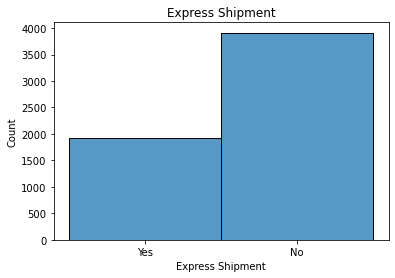

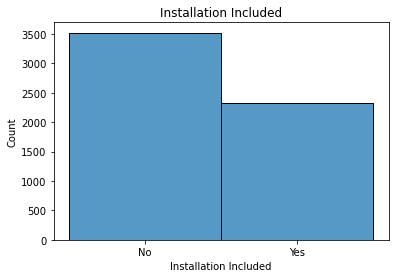

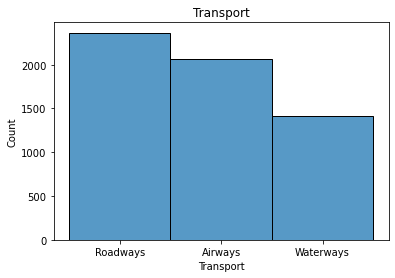

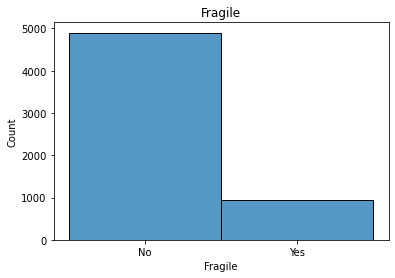

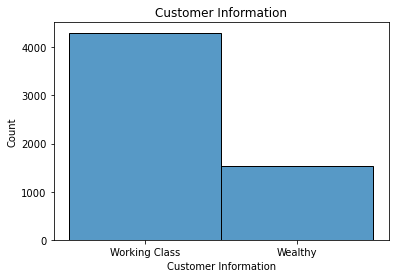

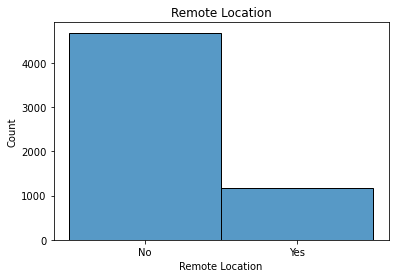

In [23]:
for i in cat_cols:
    print(od2[i].value_counts(normalize=True))
for i in cat_cols:
    plt.title(i)
    sns.histplot(x=od2[i])
    plt.show()

#### Inference:
1. We have less insformation international Artists.
2. The fragile Sculptures are less compared to non-fragile sculptures.
3. We have less data of people from remote locations compared to people who are not rom remote locations.
4. Customers of Sculptures belong to working class than from wealthy class.

In [24]:
od2.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Artist Reputation,5841.0,0.462609,2.503855e-01,0.00,0.010,0.020,0.040,0.050,0.06,0.12,0.27,0.461850,0.64,0.820000,0.90,0.920,0.940,0.960,0.976,1.000000e+00
Height,5841.0,21.802387,1.159799e+01,3.00,3.000,3.000,4.000,4.000,5.00,7.00,13.00,21.766204,29.00,37.000000,43.00,45.000,47.000,49.000,53.600,7.300000e+01
Width,5841.0,9.639742,5.181158e+00,2.00,2.000,3.000,3.000,4.000,4.00,4.00,6.00,8.000000,12.00,16.000000,20.00,21.000,22.000,24.000,27.000,5.000000e+01
Weight,5841.0,406835.067865,2.645446e+06,3.00,18.400,33.800,46.000,58.000,71.00,154.00,591.00,4532.000000,95985.00,400694.821918,1255108.00,1630192.800,2498482.800,4431754.000,8203290.400,1.179279e+08
Price Of Sculpture,5841.0,1220.602223,9.163809e+03,3.00,3.080,3.180,3.290,3.370,3.45,3.89,5.24,8.100000,90.36,1059.020000,3633.01,4913.916,7353.226,13055.010,25973.666,3.823857e+05
Base Shipping Price,5841.0,37.435756,2.683488e+01,10.00,10.274,10.540,10.790,11.070,11.32,12.71,16.75,23.570000,58.03,83.010000,91.42,93.418,95.270,96.864,98.480,9.998000e+01
Cost,5841.0,20019.144936,2.531525e+05,86.07,111.944,121.342,128.596,135.188,142.20,163.55,227.89,460.600000,1380.21,6239.740000,21901.77,33432.310,52329.860,103517.960,304347.868,1.114343e+07


#### Inference:
1. Data Contains Outlier on upper limit
2. Seeing The mean and STD we can say that data is reliably distributed

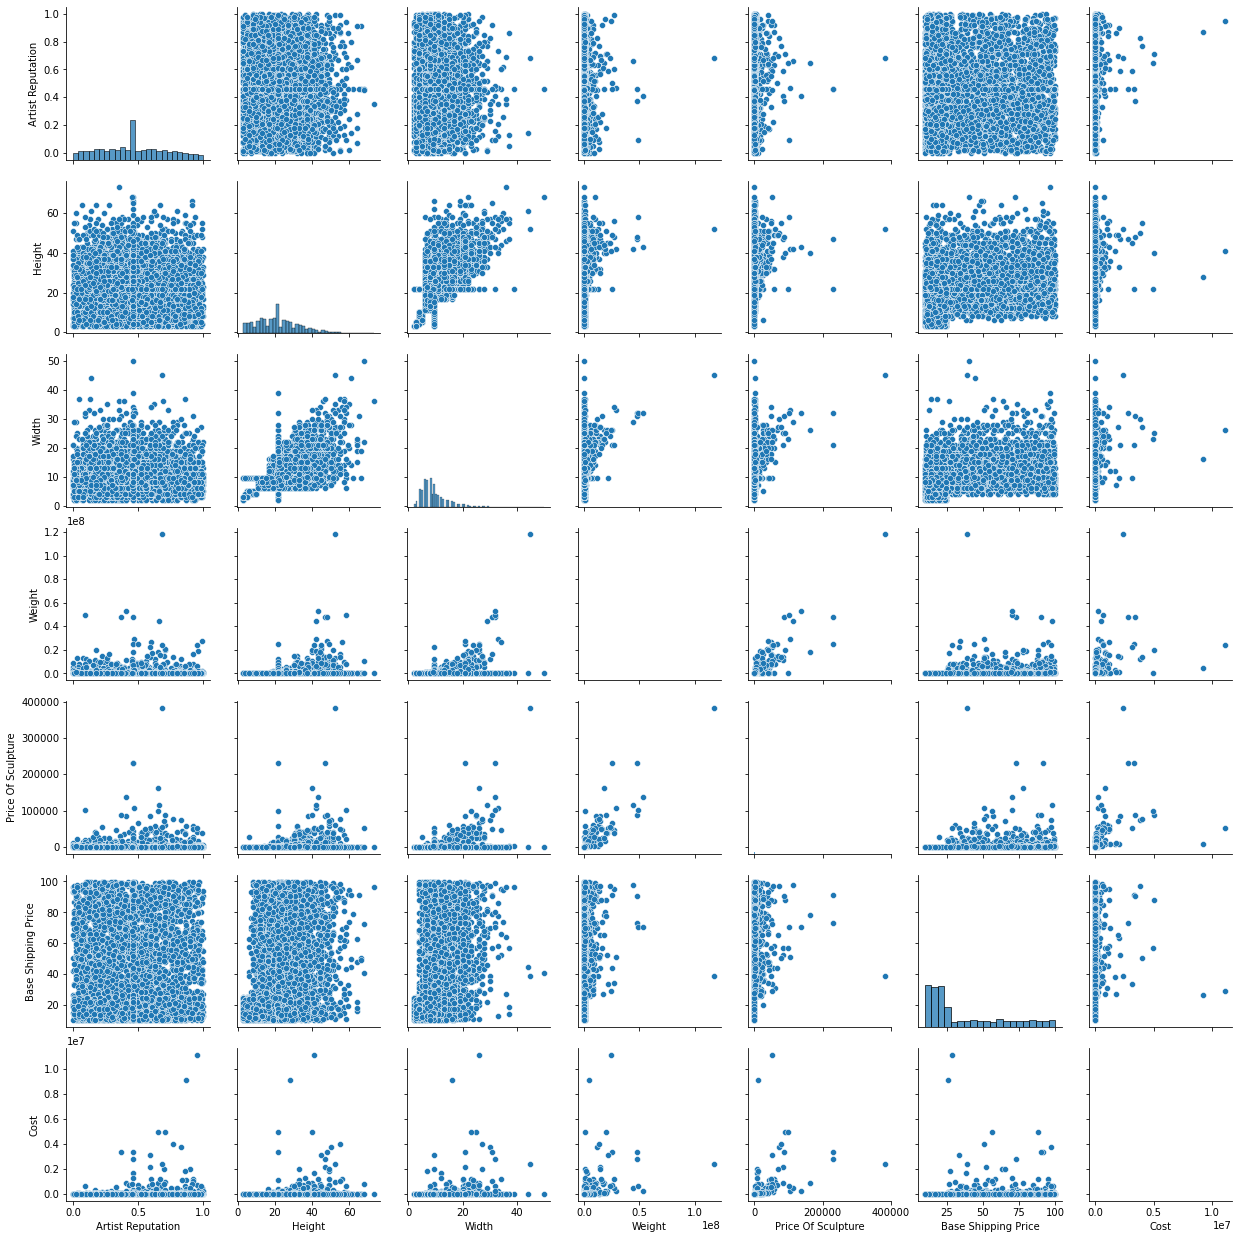

In [25]:
sns.pairplot(data=od2)
plt.show()

#### Inference:
No Relation Can be established between Features.

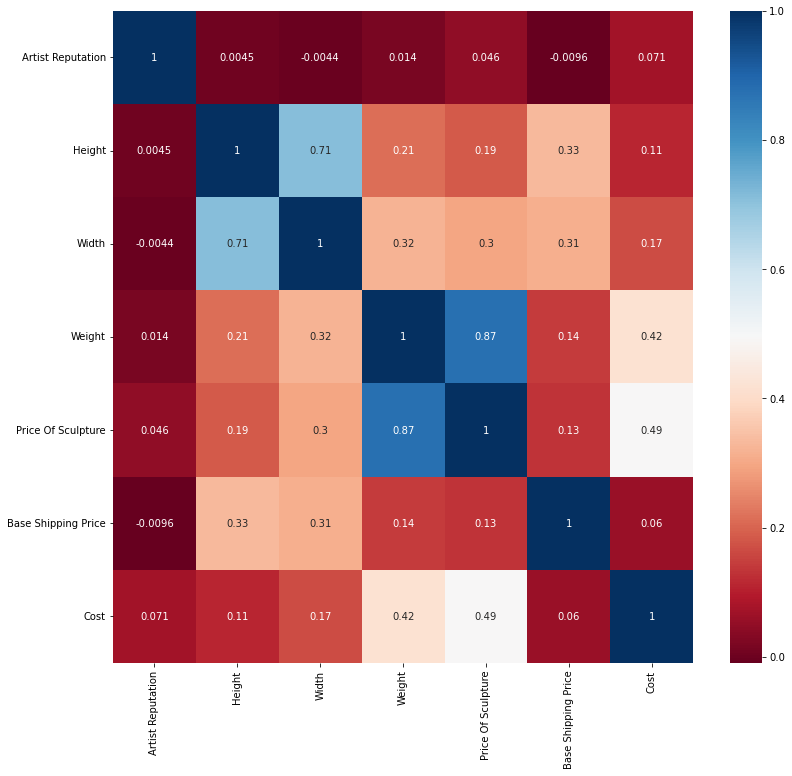

In [26]:
plt.figure(figsize=(13,12))
corr= od2.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Inference:
1. Height and width are highly correlated with each other.
2. Weight and price of Sculpture is highly correlated with each other.

In [27]:
for i in num_cols:
    od2[i]=od2[i].clip(upper=od2[i].quantile(0.98))

In [28]:
od2.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
Artist Reputation,5841.0,0.462273,0.249700,0.00,0.010,0.020,0.040,0.461850,0.940,9.600000e-01,0.960,0.960
Height,5841.0,21.686825,11.272251,3.00,3.000,3.000,4.000,21.766204,47.000,4.900000e+01,49.000,49.000
Width,5841.0,9.543526,4.817958,2.00,2.000,3.000,3.000,8.000000,22.000,2.400000e+01,24.000,24.000
Weight,5841.0,243915.301729,746792.168290,3.00,18.400,33.800,46.000,4532.000000,2498482.800,4.429463e+06,4431754.000,4431754.000
Price Of Sculpture,5841.0,628.509283,2212.033342,3.00,3.080,3.180,3.290,8.100000,7353.226,1.300983e+04,13055.010,13055.010
Base Shipping Price,5841.0,37.403999,26.763187,10.00,10.274,10.540,10.790,23.570000,95.270,9.686080e+01,96.864,96.864
Cost,5841.0,4848.850024,16817.440639,86.07,111.944,121.342,128.596,460.600000,52329.860,1.034021e+05,103517.960,103517.960


### Categorical Columns Transformation

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    od2[i]=le.fit_transform(od2[i])

In [30]:
od2

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost
650,0.94,5.000000,5.000000,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,561.98
651,0.64,5.000000,5.000000,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,2018-11-26,243.11
652,0.29,21.766204,9.000000,1382.0,4,4.98,15.04,0,0,1,1,1,0,0,2019-02-13,2019-02-13,224.14
653,0.74,25.000000,18.000000,917520.0,4,848.75,52.62,0,1,1,1,0,0,0,2017-12-18,2017-12-18,87760.07
654,0.61,14.000000,7.000000,3172.0,2,12.78,10.23,0,1,0,0,0,1,0,2015-12-22,2015-12-20,317.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.000000,10.000000,16551.0,1,28.28,38.46,1,1,0,0,0,0,1,2018-03-28,2018-03-25,872.43
6496,0.67,15.000000,9.617647,18981.0,3,67.18,27.72,0,0,0,1,0,1,0,2015-08-29,2015-08-27,1347.02
6497,0.68,19.000000,8.000000,587.0,3,6.92,10.38,1,0,0,1,1,0,0,2019-04-10,2019-04-09,354.55
6498,0.02,33.000000,9.000000,1269377.0,5,2929.13,69.76,0,1,0,1,0,1,1,2019-03-10,2019-03-12,5037.50


### Feature Selection

In [31]:
y = od2['Cost']
x = od2.drop(['Scheduled Date', 'Delivery Date', 'Cost'], axis = 1)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [34]:
imp=pd.DataFrame({"var":x.columns,"imp":rf.feature_importances_}).sort_values(by=["imp"],ascending=False)
imp

,var,imp
5,Price Of Sculpture,0.797657
0,Artist Reputation,0.075884
3,Weight,0.031319
2,Width,0.021721
6,Base Shipping Price,0.020484
8,Express Shipment,0.019004
1,Height,0.014525
10,Transport,0.006036
4,Material,0.003689
9,Installation Included,0.002795


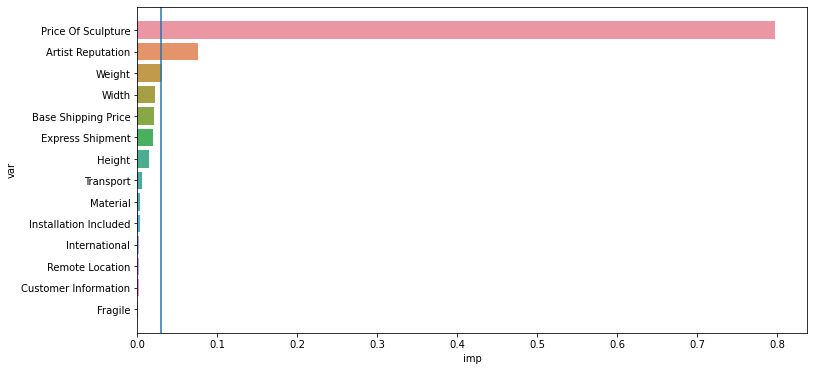

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x = "imp",y="var",data = imp)
plt.axvline(x = 0.03)
plt.plot()
plt.show()

In [36]:
selected_var=imp[imp["imp"]>=0.03]["var"].to_list()         #important variable selection so to ease in prediction
selected_var

['Price Of Sculpture', 'Artist Reputation', 'Weight']

In [37]:
sf=od2[['Price Of Sculpture',
 'Base Shipping Price',
 'Artist Reputation',
 'Weight',
 'Height',
 'Material']]
sf.shape

(5841, 6)

#### Lets Analyse performance of Model with and without selection

In [38]:
sf

,Price Of Sculpture,Base Shipping Price,Artist Reputation,Weight,Height,Material
650,6.17,23.53,0.94,62.0,5.000000,6
651,5.74,15.91,0.64,315.0,5.000000,1
652,4.98,15.04,0.29,1382.0,21.766204,4
653,848.75,52.62,0.74,917520.0,25.000000,4
654,12.78,10.23,0.61,3172.0,14.000000,2
...,...,...,...,...,...,...
6495,28.28,38.46,0.37,16551.0,37.000000,1
6496,67.18,27.72,0.67,18981.0,15.000000,3
6497,6.92,10.38,0.68,587.0,19.000000,3
6498,2929.13,69.76,0.02,1269377.0,33.000000,5


In [39]:
import statsmodels.api as sm  #OLS

In [40]:
OLS1=sm.add_constant(x)
reg=sm.OLS(y, OLS1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     915.5
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:49:30   Log-Likelihood:                -61725.
No. Observations:                5841   AIC:                         1.235e+05
Df Residuals:                    5826   BIC:                         1.236e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5177.47

In [41]:
OLS2=sm.add_constant(sf)
reg=sm.OLS(y, OLS2).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2096.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:49:30   Log-Likelihood:                -61766.
No. Observations:                5841   AIC:                         1.235e+05
Df Residuals:                    5834   BIC:                         1.236e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4370.3150    

->Model isn't performing well on linear Regression so lets check its performance on Ensemble Methods.

### Model Development

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(sf, y, test_size=0.25, random_state = 21)

In [44]:
rf = RandomForestRegressor(n_estimators=200, n_jobs = -1)

In [45]:
#Fit
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [46]:
R2 = r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
print("R2:",R2,"RMSE:",MSE)

R2: 0.8665772227826798 RMSE: 41256070.29763064


In [47]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

C:\Users\abhis\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

C:\Users\abhis\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
y_pred2=xg.predict(x_test)

In [50]:
R2 = r2_score(y_test,y_pred2)
MSE=mean_squared_error(y_test,y_pred2)
print("R2:",R2,"MSE:",MSE)

R2: 0.8748965225830903 MSE: 38683633.832500264


-------XGBoost is performing best-------------